<a href="https://colab.research.google.com/github/velamalaappu/ICC-ML-AND-DL-ANALYSIS/blob/main/MODULE_5_SPEECH_EMOTION_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPEECH EMOTION REGRESSION**

### **PROBLEM STATEMENT**

Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello.We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech.

In [ ]:
import os
Root = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data"
os.chdir(Root)

In [ ]:
ls

Actor_01/  Actor_06/  Actor_11/  Actor_16/  Actor_21/
Actor_02/  Actor_07/  Actor_12/  Actor_17/  Actor_22/
Actor_03/  Actor_08/  Actor_13/  Actor_18/  Actor_23/
Actor_04/  Actor_09/  Actor_14/  Actor_19/  Actor_24/
Actor_05/  Actor_10/  Actor_15/  Actor_20/  modelForPrediction1.sav


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-5.43256897e+02,  5.28675842e+01, -4.83773422e+00, ...,
         3.38275539e-04,  1.65842270e-04,  7.32426124e-05],
       [-5.14328491e+02,  2.98544731e+01, -2.14588776e+01, ...,
         2.86292314e-04,  1.75987312e-04,  1.66227081e-04],
       [-6.87338623e+02,  5.79782219e+01,  1.20546304e-01, ...,
         9.61556088e-06,  4.42559667e-06,  1.58340845e-06],
       ...,
       [-6.01970032e+02,  3.13942509e+01, -3.05272713e+01, ...,
         4.32201959e-05,  2.31621452e-05,  2.40006466e-05],
       [-3.87427673e+02,  2.08523273e+01, -3.09367542e+01, ...,
         9.86394007e-04,  6.89390348e-04,  3.32397205e-04],
       [-6.33881592e+02,  5.07888412e+01, -4.08104467e+00, ...,
         1.86087818e-05,  1.39995200e-05,  5.20769800e-06]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['disgust', 'calm', 'happy', 'fearful', 'calm', 'happy', 'disgust',
       'disgust', 'calm', 'disgust', 'calm', 'calm', 'fearful', 'fearful',
       'calm', 'fearful', 'fearful', 'calm', 'calm', 'fearful', 'disgust',
       'disgust', 'disgust', 'disgust', 'happy', 'fearful', 'fearful',
       'fearful', 'calm', 'disgust', 'calm', 'happy', 'fearful', 'happy',
       'happy', 'fearful', 'happy', 'fearful', 'disgust', 'fearful',
       'disgust', 'calm', 'happy', 'disgust', 'happy', 'calm', 'happy',
       'happy', 'happy', 'calm', 'happy', 'happy', 'happy', 'fearful',
       'fearful', 'calm', 'calm', 'fearful', 'calm', 'disgust', 'calm',
       'calm', 'disgust', 'disgust', 'calm', 'disgust', 'disgust',
       'happy', 'calm', 'calm', 'happy', 'happy', 'calm', 'disgust',
       'happy', 'fearful', 'calm', 'fearful', 'disgust', 'happy',
       'fearful', 'happy', 'calm', 'happy', 'fearful', 'fearful', 'happy',
       'calm', 'calm', 'happy', 'happy', 'calm', 'calm', 'disgust',
  

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.23%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.81355932, 0.63157895, 0.71910112, 0.65346535])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,disgust,disgust
1,calm,calm
2,happy,happy
3,disgust,fearful
4,disgust,calm
5,happy,happy
6,disgust,disgust
7,disgust,disgust
8,disgust,calm
9,disgust,disgust


In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("//content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['happy'], dtype='<U7')

In [ ]:
feature

array([[-6.93497009e+02,  5.00643921e+01,  5.71450531e-01,
         1.43299656e+01,  3.33637071e+00, -2.54071975e+00,
        -4.05790949e+00, -1.07119999e+01, -7.29413939e+00,
         1.74018872e+00, -4.19064236e+00,  1.95466173e+00,
        -5.24789381e+00,  2.78142977e+00, -3.16756773e+00,
        -3.40008307e+00, -2.37803197e+00, -5.68717539e-01,
        -6.47753334e+00, -1.24320555e+00, -2.80542517e+00,
        -5.43635798e+00, -4.46875393e-01, -3.63516593e+00,
        -2.98372602e+00, -5.63902557e-01, -1.65101993e+00,
        -5.55944741e-01, -3.41018438e+00, -2.24465466e+00,
        -3.13058877e+00, -2.70089960e+00, -1.88821292e+00,
        -5.54154456e-01, -3.96459913e+00, -2.13485193e+00,
        -3.94577074e+00, -1.62457860e+00, -2.03990698e+00,
        -3.62910867e+00,  6.33751631e-01,  6.48747087e-01,
         6.21731520e-01,  6.34555459e-01,  6.60326064e-01,
         6.60485923e-01,  7.00930357e-01,  7.31556237e-01,
         7.46886790e-01,  7.23434567e-01,  7.16107428e-0

In [ ]:
!pip install librosa

In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_03/03-01-01-01-02-02-03.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


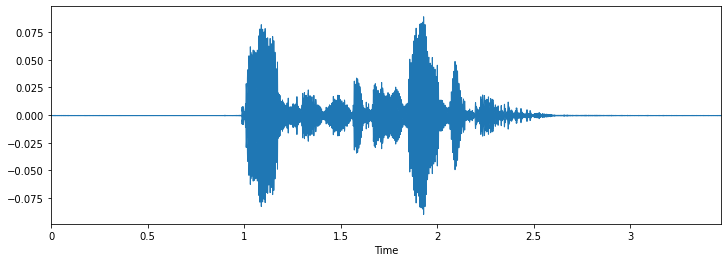

In [ ]:
% pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)